In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
sns.set_style('whitegrid')

In [5]:
  
import pandas as pd
from pandas import read_csv
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import csv
import time
acc_list_of_arrays=[]
with open('/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/chess.csv', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        temp= temp[:-1]
        print(temp)
        acc_list_of_arrays.append(temp)


['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '34', '36', '38', '40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74']
['1', '3', '5', '7', '9', '12', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '34', '36', '38', '40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74']
['1', '3', '5', '7', '9', '12', '13', '16', '17', '19', '21', '23', '25', '27', '29', '31', '34', '36', '38', '40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74']
['1', '3', '5', '7', '9', '11', '13', '15', '17', '20', '21', '23', '25', '27', '29', '31', '34', '36', '38', '40', '42', '44', '47', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74']
['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '34', '36', '38', '40', '42', '44', 

In [6]:
start_time = time.process_time()
te = TransactionEncoder()
te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
df = pd.DataFrame(te_ary, columns=te.columns_)
result= apriori(df, min_support=0.8, use_colnames=True)
print ((time.process_time() - start_time),"seconds")
print(result)

1.7280423119999995 seconds
       support                                  itemsets
0     0.894869                                      (25)
1     0.995307                                      (29)
2     0.888298                                       (3)
3     0.951189                                      (34)
4     0.969650                                      (36)
...        ...                                       ...
8222  0.806320       (52, 62, 36, 66, 48, 40, 58, 60, 7)
8223  0.803191  (52, 62, 36, 66, 34, 48, 40, 58, 29, 60)
8224  0.804130   (52, 36, 66, 34, 48, 40, 58, 29, 60, 7)
8225  0.801627   (52, 56, 62, 36, 48, 40, 58, 29, 60, 7)
8226  0.805069   (52, 62, 36, 66, 48, 40, 58, 29, 60, 7)

[8227 rows x 2 columns]


In [7]:
!pip install mlxtend --upgrade

In [8]:
from mlxtend.frequent_patterns import fpgrowth
import time 
start = time.time()
fpgrowth_val = fpgrowth(df, min_support=0.8, use_colnames = True )
end = time.time()
print(fpgrowth_val)
print(end-start)


       support              itemsets
0     0.999687                  (58)
1     0.996558                  (52)
2     0.995307                  (29)
3     0.991865                  (40)
4     0.985294                  (60)
...        ...                   ...
8222  0.805382      (44, 40, 52, 58)
8223  0.804130      (44, 29, 40, 58)
8224  0.801001      (29, 40, 52, 44)
8225  0.800688  (52, 40, 58, 44, 29)
8226  0.802253          (44, 58, 60)

[8227 rows x 2 columns]
0.3740074634552002


In [9]:
threshold = {
     'Threshold(0.7)' : 0.7,
     'Threshold(0.75)' : 0.75,
     'Threshold(0.8)' : 0.8,
     'Threshold(0.85)' : 0.85,
     'Threshold(0.9)' : 0.9, 
}
columns = []
compare = pd.DataFrame(columns = columns)
row_index = 0
for name,value in threshold.items():
  threshold_name = name
  fp_start_time = time.process_time()
  fp_growth = fpgrowth(df, min_support= value,  use_colnames=True)
  fp_end_time = time.process_time() 
  fp_time =fp_end_time - fp_start_time

  ap_start_time = time.process_time()
  appriori =  apriori(df, min_support= value, use_colnames = True, verbose=1)
  ap_end_time = time.process_time()
  ap_time = ap_end_time  - ap_start_time
  compare.loc[row_index,'threshold'] = threshold_name
  compare.loc[row_index, 'fp-growth'] = fp_time
  compare.loc[row_index, 'appriori'] = ap_time
  row_index+=1
compare

Processing 13 combinations | Sampling itemset size 13
Processing 72 combinations | Sampling itemset size 12
Processing 11 combinations | Sampling itemset size 11
Processing 180 combinations | Sampling itemset size 9
Processing 48 combinations | Sampling itemset size 8


,threshold,fp-growth,appriori
0,Threshold(0.7),1.347756,5.421963
1,Threshold(0.75),0.641341,1.608446
2,Threshold(0.8),0.252687,0.828380
3,Threshold(0.85),0.130406,0.220716
4,Threshold(0.9),0.069082,0.059492


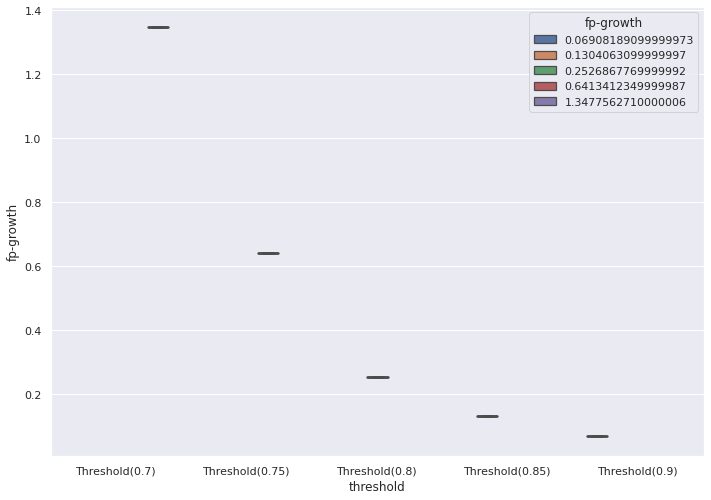

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="threshold", y="fp-growth", hue="fp-growth",
                 data=compare, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/fp_chess.png")

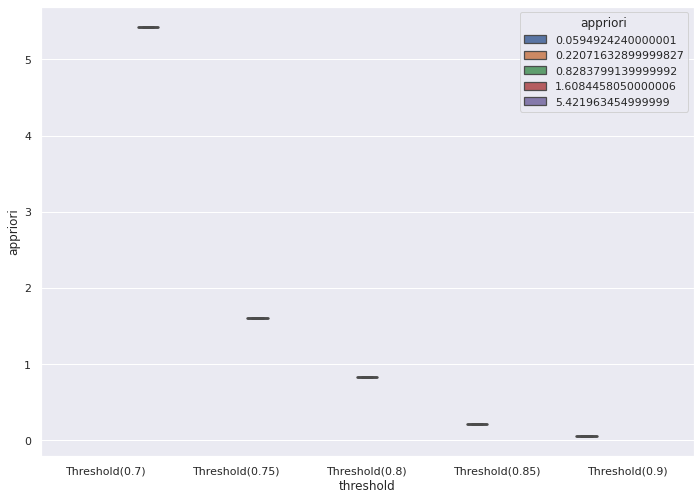

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="threshold", y="appriori", hue="appriori",
                 data=compare, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/ap_chess.png")

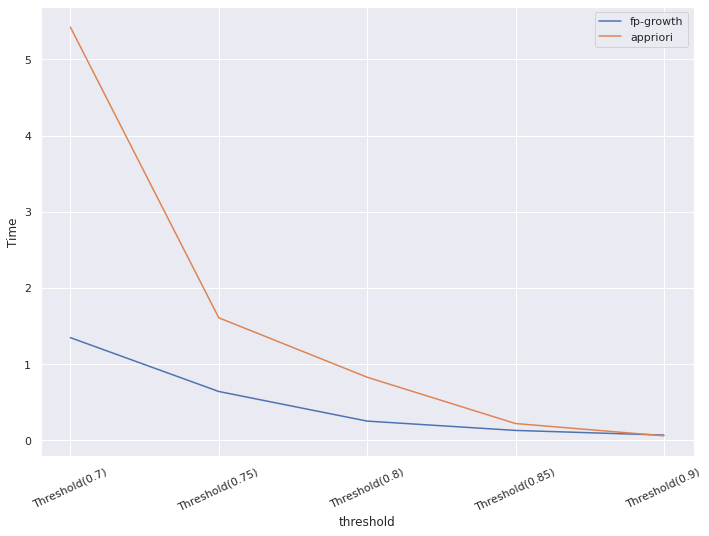

In [14]:
sns.lineplot(x = "threshold", y = "fp-growth", data = compare)
sns.lineplot(x = "threshold", y = "appriori", data = compare)
plt.legend(['fp-growth', 'appriori'], loc='best')
plt.ylabel("Time")
plt.xticks(rotation = 25)

plt.show()